In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt

X_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.1)

X_clf, y_clf = make_classification(n_samples=1000, n_features=20, n_classes=2)

X_reg_train, X_reg_test = train_test_split(X_reg, test_size=0.2, random_state=42)
y_reg_train, y_reg_test = train_test_split(y_reg, test_size=0.2, random_state=42)

X_clf_train, X_clf_test = train_test_split(X_clf, test_size=0.2, random_state=42)
y_clf_train, y_clf_test = train_test_split(y_clf, test_size=0.2, random_state=42)

In [28]:
from sklearn.neural_network import MLPRegressor
model_reg = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
model_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = model_reg.predict(X_reg_test)


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
from sklearn.neural_network import MLPClassifier
model_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
model_clf.fit(X_clf_train, y_clf_train)
y_clf_pred = model_clf.predict(X_clf_test)

c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Size: 5, Max Iter: 100, Learning Rate: 0.01, MSE: 3485.157662909536
Hidden Layer Size: 10, Max Iter: 100, Learning Rate: 0.01, MSE: 528.1615795469683


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Size: 15, Max Iter: 100, Learning Rate: 0.01, MSE: 430.7572630021668
Hidden Layer Size: 20, Max Iter: 100, Learning Rate: 0.01, MSE: 372.9945275834062


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Size: 10, Max Iter: 100, Learning Rate: 0.01, MSE: 690.0064173924678


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Size: 10, Max Iter: 1000, Learning Rate: 0.01, MSE: 3.6757352847146945
Hidden Layer Size: 10, Max Iter: 2000, Learning Rate: 0.01, MSE: 1.1985023448799816
Hidden Layer Size: 10, Max Iter: 1000, Learning Rate: 0.1, MSE: 0.5940307629408663


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Size: 10, Max Iter: 1000, Learning Rate: 0.01, MSE: 5.063968108450259


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Size: 10, Max Iter: 1000, Learning Rate: 0.001, MSE: 522.9150818662712


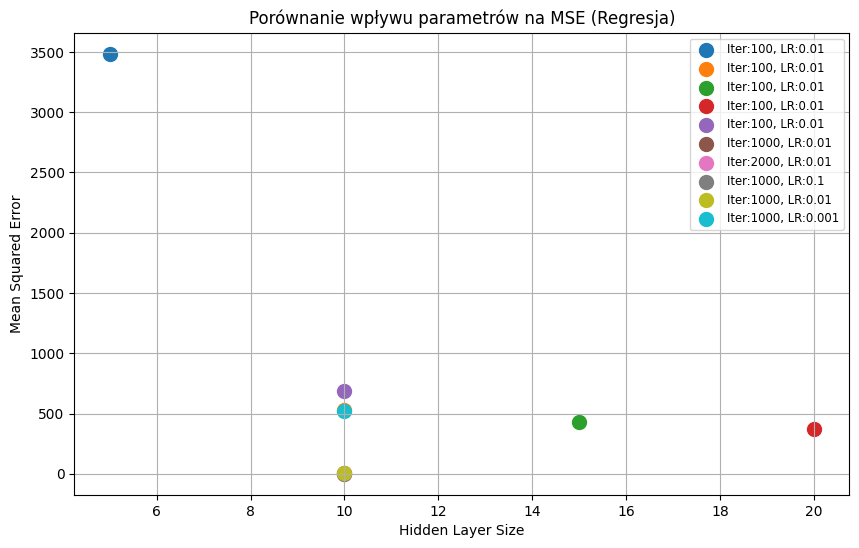

In [30]:
def build_and_evaluate_regression_model(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10,), max_iter=1000, learning_rate_init=0.001):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=max_iter, learning_rate_init=learning_rate_init)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Parametry do porównania wpływu liczby warstw, iteracji i learning rate
hyperparameters = [
    # Zmieniamy liczbę warstw
    [5, 100, 0.01],
    [10, 100, 0.01],
    [15, 100, 0.01],
    [20, 100, 0.01],
    # Zmieniamy liczbę iteracji
    [10, 100, 0.01],
    [10, 1000, 0.01],
    [10, 2000, 0.01],
    # Zmieniamy learning rate
    [10, 1000, 0.1],
    [10, 1000, 0.01],
    [10, 1000, 0.001]
]
results = []

for params in hyperparameters:
    hidden_size, max_iter, lr = params
    y_reg_pred = build_and_evaluate_regression_model(X_reg_train, y_reg_train, X_reg_test, y_reg_test, hidden_layer_sizes=(hidden_size,), max_iter=max_iter, learning_rate_init=lr)
    mse = mean_squared_error(y_reg_test, y_reg_pred)
    results.append((hidden_size, max_iter, lr, mse))
    print(f"Hidden Layer Size: {hidden_size}, Max Iter: {max_iter}, Learning Rate: {lr}, MSE: {mse}")
    
hidden_sizes = [r[0] for r in results]
mses = [r[3] for r in results]
plt.figure(figsize=(10, 6))
for i, params in enumerate(hyperparameters):
    hidden_size, max_iter, lr = params
    plt.scatter(hidden_size, results[i][3], label=f"Iter:{max_iter}, LR:{lr}", s=100)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error')
plt.title('Porównanie wpływu parametrów na MSE (Regresja)')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mateu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

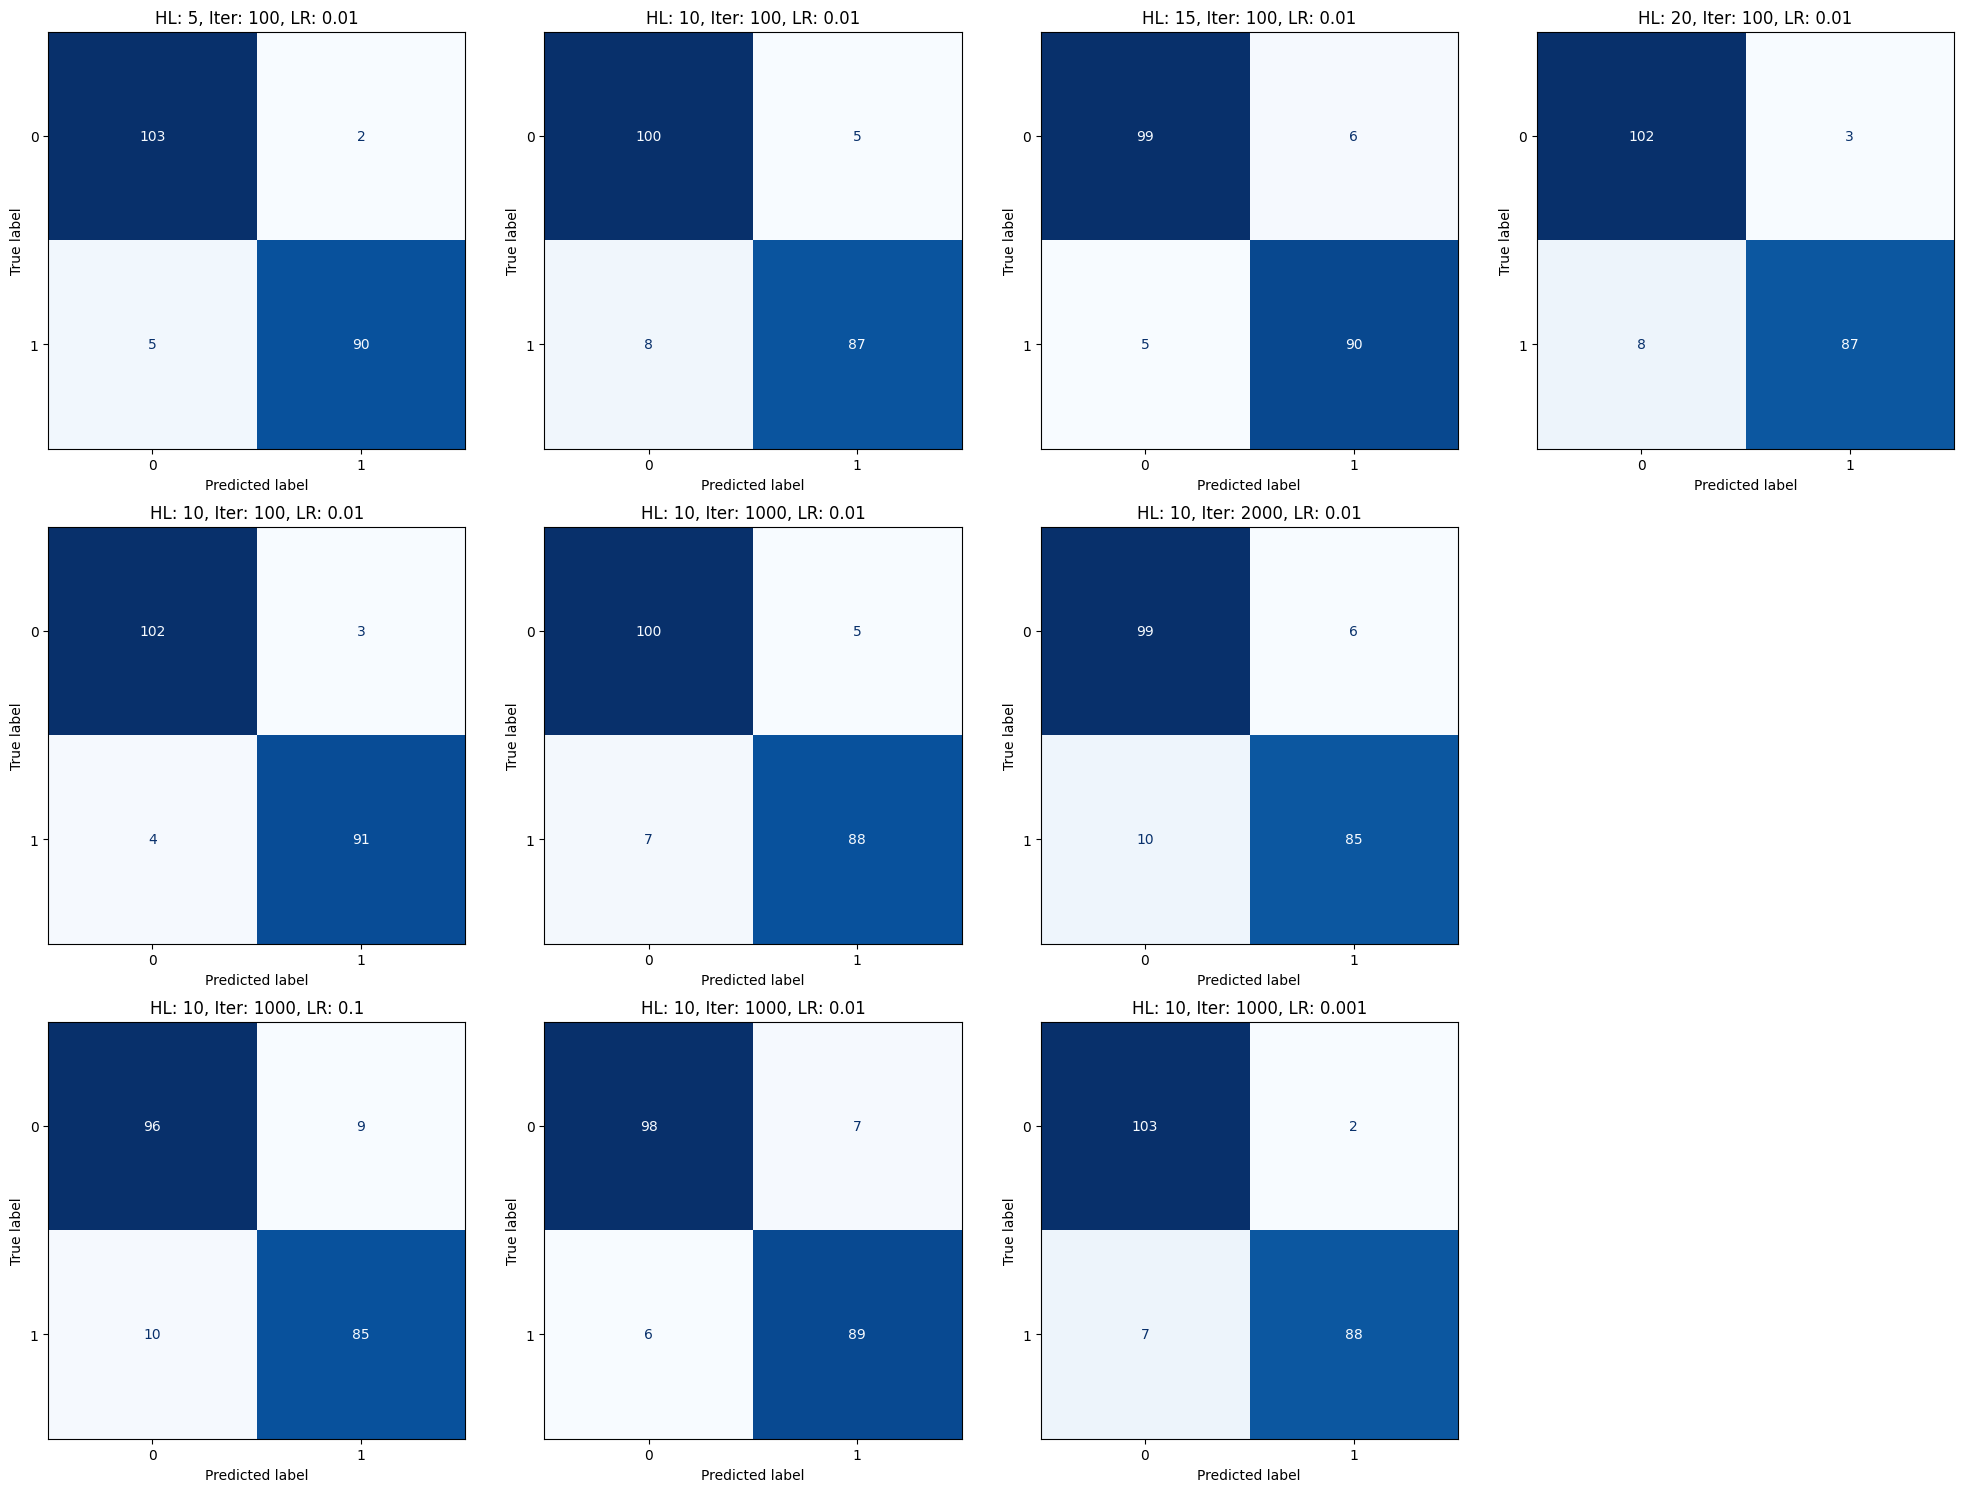

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def build_and_evaluate_classification_model(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10,), max_iter=1000, learning_rate_init=0.001):
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=max_iter, learning_rate_init=learning_rate_init)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

hyperparameters = [
    # Zmieniamy liczbę warstw
    [5, 100, 0.01],
    [10, 100, 0.01],
    [15, 100, 0.01],
    [20, 100, 0.01],
    # Zmieniamy liczbę iteracji
    [10, 100, 0.01],
    [10, 1000, 0.01],
    [10, 2000, 0.01],
    # Zmieniamy learning rate
    [10, 1000, 0.1],
    [10, 1000, 0.01],
    [10, 1000, 0.001]
]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, params in enumerate(hyperparameters):
    hidden_size, max_iter, lr = params
    y_clf_pred = build_and_evaluate_classification_model(X_clf_train, y_clf_train, X_clf_test, y_clf_test, hidden_layer_sizes=(hidden_size,), max_iter=max_iter, learning_rate_init=lr)
    
    cm = confusion_matrix(y_clf_test, y_clf_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    if i < 4:
        row = 0
        col = i
    elif i < 7:
        row = 1
        col = i - 4
    else:
        row = 2
        col = i - 7

    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"HL: {hidden_size}, Iter: {max_iter}, LR: {lr}")

axes[1, 3].axis('off')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()